In [67]:
# Import pandas
import numpy as np
from scipy.stats import mode
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
import statsmodels.api as sm
import os
import copy

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Importing the data

In [68]:
# Read in dataset
banking_df = pd.read_csv(os.getcwd()+os.sep+'Churn_Modelling.csv')
pd.set_option('display.max_columns', None)

In [69]:
# Print header
banking_df.head()
#Dimensions of the data and investigate if there are any duplicate rows
banking_df.shape

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

(10000, 14)

In [70]:
# Print info
banking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [71]:
#Uncomment only if you have pandas profiling installed

# import pandas_profiling
# pandas_profiling.ProfileReport(banking_df)

Render HTML: 100%|██████████| 1/1 [00:01<00:00,  1.61s/it]


In [72]:
# Take a look at unique values in telco
banking_df.nunique()
# Finding the null values for each column
print(banking_df.isnull().sum())

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


### data cleaning

In [73]:
#drop columns
banking_df = banking_df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'])
banking_df.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

In [74]:
#change data type
banking_df = banking_df.replace({'France' : 1, 'Spain' : 2, 'Germany' : 3})
banking_df = banking_df.replace({'Female' : 1, 'Male' : 2})
banking_df.head()
banking_df.info()


CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619          1       1   42       2       0.00              1   
1          608          2       1   41       1   83807.86              1   
2          502          1       1   42       8  159660.80              3   
3          699          1       1   39       1       0.00              2   
4          850          2       1   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


In [75]:
# Get all features
features = [column_name for column_name in banking_df.columns if column_name != 'Exited']

# Get all categorical features
categorical = [column_name for column_name in features if banking_df[column_name].dtype == 'object']

# Get all numeric columns
numeric = [column_name for column_name in features if column_name not in categorical]
features
categorical
numeric

['CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary']

[]

['CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary']

Identifying Outliers

In [76]:
import plotly.express as px

for feature in features:
    # df = px.data.tips()
    fig = px.box(banking_df, y=feature)
    fig.show()

<Figure size 720x360 with 0 Axes>

/opt/anaconda3/envs/tensor_flow/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



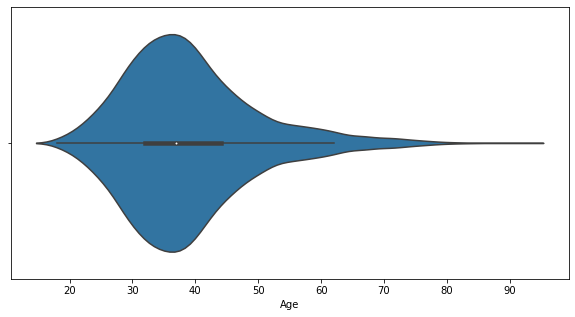

In [77]:
plt.figure(figsize = (10,5))
ax= sns.violinplot(banking_df['Age'])
plt.show()

<Figure size 720x360 with 0 Axes>

<AxesSubplot:xlabel='Exited', ylabel='Balance'>

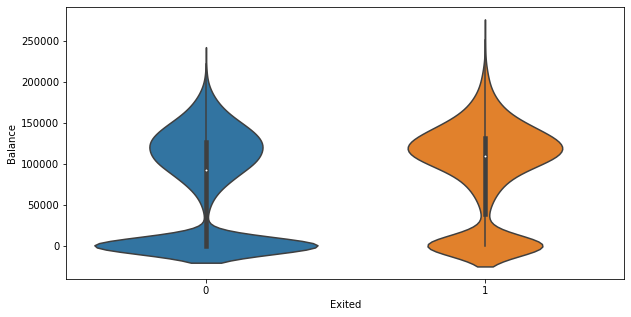

In [78]:
plt.figure(figsize = (10,5))
sns.violinplot(y = 'Balance', x = 'Exited', data = banking_df)
plt.show()

<Figure size 720x360 with 0 Axes>

<AxesSubplot:xlabel='Exited', ylabel='Age'>

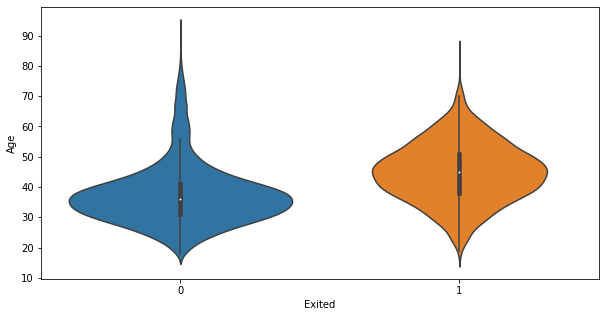

In [79]:
plt.figure(figsize = (10,5))
sns.violinplot(y = 'Age', x = 'Exited', data = banking_df)
plt.show()

<Figure size 720x360 with 0 Axes>

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

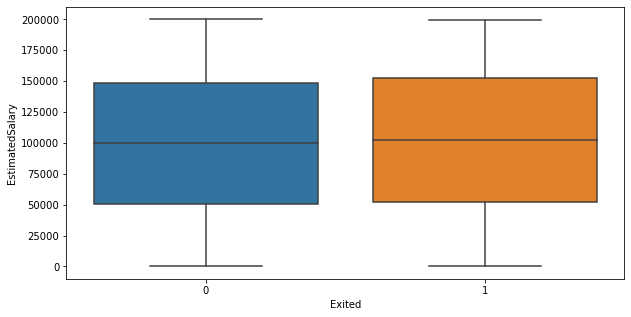

In [80]:
plt.figure(figsize = (10,5))
sns.boxplot(y = 'EstimatedSalary', x = 'Exited', data = banking_df)
plt.show()

Linear regression

In [81]:
X = banking_df[features]
Y = banking_df['Exited']

In [82]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split data into train test splits
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size = 0.20, random_state=123)

In [83]:
log_reg = sm.OLS(train_Y, train_X).fit()

In [84]:
print(log_reg.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Exited   R-squared (uncentered):                   0.316
Model:                            OLS   Adj. R-squared (uncentered):              0.316
Method:                 Least Squares   F-statistic:                              369.9
Date:                Fri, 22 Oct 2021   Prob (F-statistic):                        0.00
Time:                        01:18:44   Log-Likelihood:                         -3449.2
No. Observations:                8000   AIC:                                      6918.
Df Residuals:                    7990   BIC:                                      6988.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [85]:
from statsmodels.tools.eval_measures import rmse
def get_RSME(model,test_X,test_Y):
    prediction = model.predict(test_X)
    rmse_value = rmse(test_Y, prediction)
    print('RMSE : '+str(rmse_value))
    return rmse_value

Feature Optimization with Stepwise Backward

In [86]:
#Backward Stepwise selection based on RMSE
def run_with_RMSE(data, features, target,threshold):
    X = data[features]
    Y = data[target]
    train_X, test_X, train_Y, test_Y = train_test_split(
        X, Y, test_size=0.20, random_state=123)
    results = sm.OLS(train_Y, train_X).fit()
    print(results.summary())
    currentRMSE = get_RSME(results, test_X, test_Y)
    pvalues = results.pvalues.iloc[1:]
    worst_pval = pvalues.max()
    if float(currentRMSE) >= float(threshold):
        worst_feature = pvalues.idxmax()
        features.remove(worst_feature)
        threshold = currentRMSE
        print(f"Removing: {pvalues.idxmax()} with p-value: {str(worst_pval)}")
        run_with_RMSE(data, features, target,threshold)
    else:
        print(f"Best features based on stepwise backward selection are: {features}")
        print(f"Best RMSE: {currentRMSE}")

In [87]:
model_features = copy.deepcopy(features)
run_with_RMSE(banking_df,model_features,'Exited',get_RSME(log_reg,test_X,test_Y))

RMSE : 0.3710007846871785
                                 OLS Regression Results                                
Dep. Variable:                 Exited   R-squared (uncentered):                   0.316
Model:                            OLS   Adj. R-squared (uncentered):              0.316
Method:                 Least Squares   F-statistic:                              369.9
Date:                Fri, 22 Oct 2021   Prob (F-statistic):                        0.00
Time:                        01:18:44   Log-Likelihood:                         -3449.2
No. Observations:                8000   AIC:                                      6918.
Df Residuals:                    7990   BIC:                                      6988.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
----------

Decision Tree

In [88]:
from sklearn.tree import DecisionTreeRegressor
X = banking_df[features]
Y = banking_df['Exited']
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size = 0.20, random_state=123)
treemodel =DecisionTreeRegressor(max_depth=3)
treemodel.fit(train_X, train_Y)

DecisionTreeRegressor(max_depth=3)

<Figure size 1800x1440 with 0 Axes>

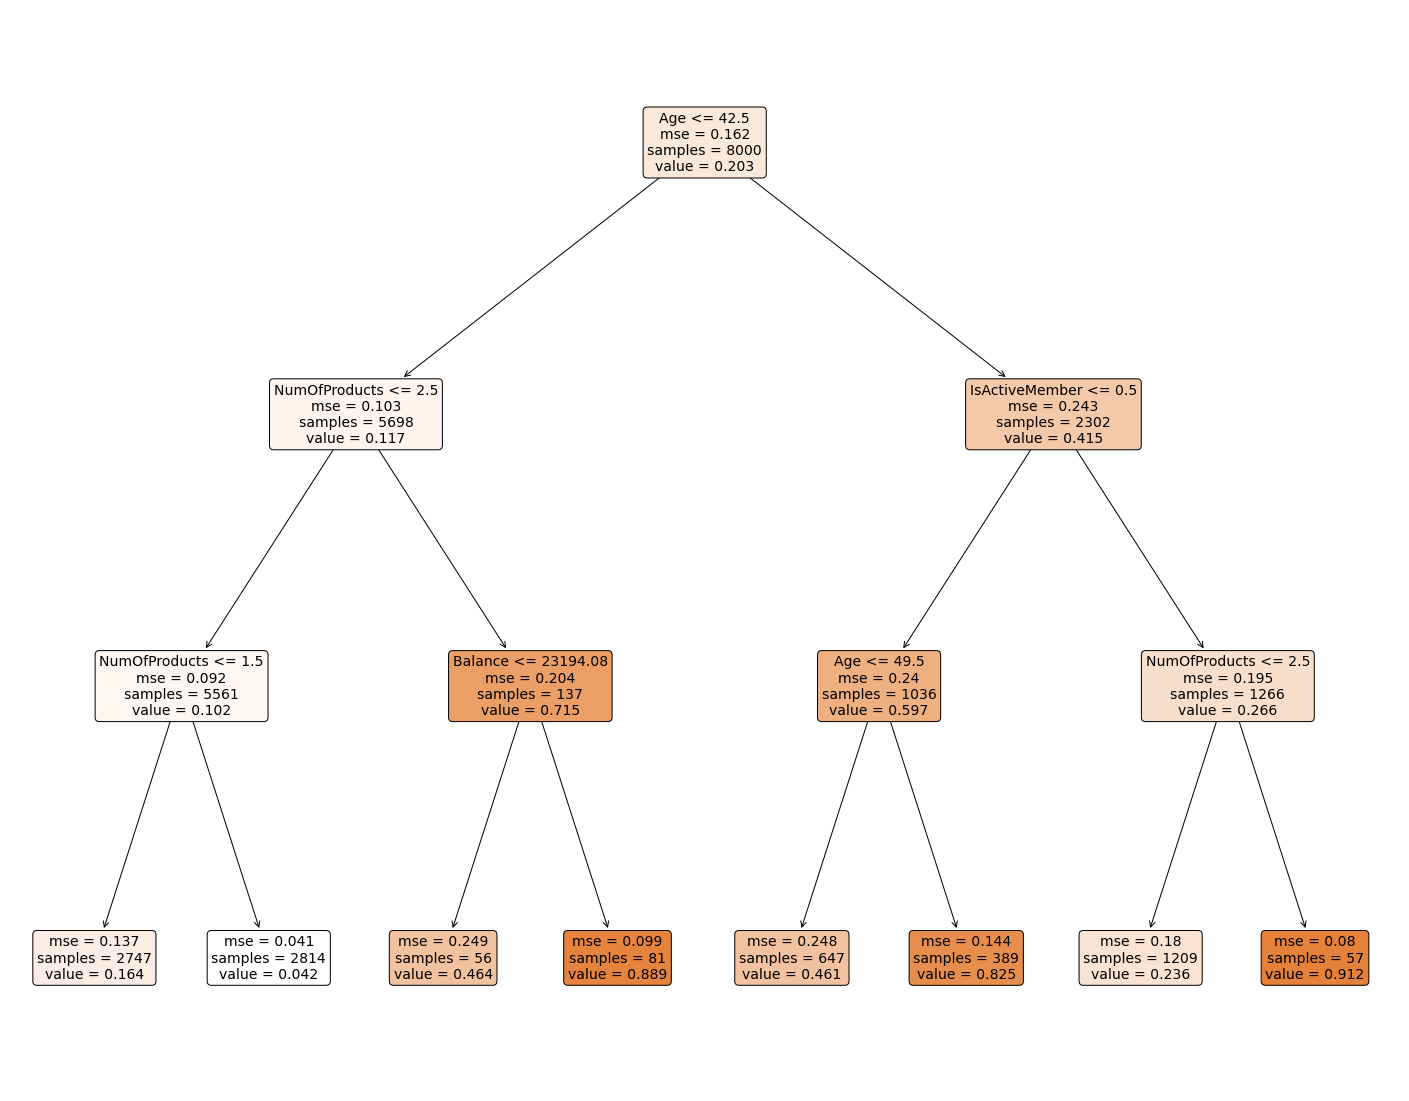

In [89]:
from sklearn import tree
plt.figure(figsize=(25,20))
plot=tree.plot_tree(treemodel, feature_names=X.columns.values.tolist(),class_names=['0','1'], filled=True, rounded=True,fontsize=14)

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.52035
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01744
Feature: 6, Score: 0.27953
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.18268
Feature: 9, Score: 0.00000


<BarContainer object of 10 artists>

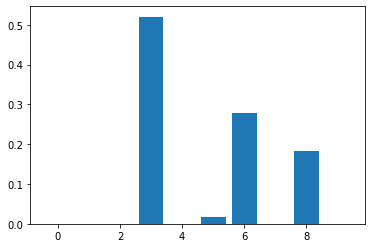

In [90]:
importance = treemodel.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [91]:
dt_prediction=treemodel.predict(test_X)
RMSE_DT = sklearn.metrics.mean_squared_error(test_Y, dt_prediction)**0.5
print("Decision Tree RMSE: ",RMSE_DT)

Decision Tree RMSE:  0.3481332500135545


In [92]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(train_X.values,train_Y.values)
xgb_prediction = xgb.predict(test_X.values)
print("XGBoost MSE: ",sklearn.metrics.mean_squared_error(test_Y,xgb_prediction))

XGBClassifier()

XGBoost MSE:  0.137


Feature: 0, Score: 0.02696
Feature: 1, Score: 0.10363
Feature: 2, Score: 0.07797
Feature: 3, Score: 0.22480
Feature: 4, Score: 0.03463
Feature: 5, Score: 0.06976
Feature: 6, Score: 0.19293
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.24376
Feature: 9, Score: 0.02556


<BarContainer object of 10 artists>

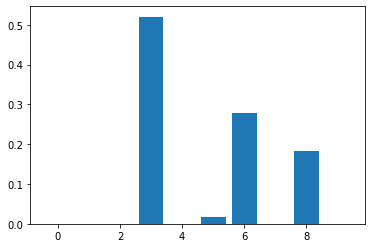

In [93]:
xgb_importance = xgb.feature_importances_
# summarize feature importance
for i,v in enumerate(xgb_importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(xgb_importance))], importance)
plt.show()

Comparing the Models

/opt/anaconda3/envs/tensor_flow/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Mean Squared Error')

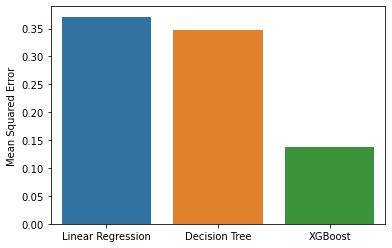

In [94]:
i = ['Linear Regression', 'Decision Tree', 'XGBoost']
j = [0.3713, 0.3481, 0.137]

sns.barplot(i, j).set_ylabel('Mean Squared Error')
plt.show()

/opt/anaconda3/envs/tensor_flow/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Time taken in seconds')

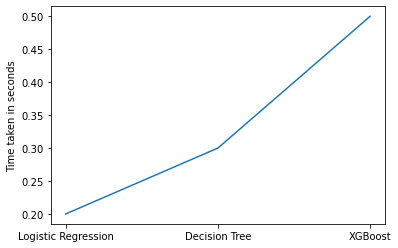

In [95]:
x = ['Logistic Regression', 'Decision Tree', 'XGBoost']
y = [0.2, 0.3, 0.5]

sns.lineplot(x, y).set_ylabel('Time taken in seconds')
plt.show()